In [1]:
import mxnet as mx
from mxnet import nd, autograd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mx.random.seed(3)

In [2]:
def generate_data(n_sample, dim, distance):
    w = nd.random_normal(shape=(dim))
    w = w/nd.norm(w)
    b = nd.random_normal(shape = (1))
    
    X = nd.zeros(shape = (n_sample, dim))
    Y = nd.zeros(shape = (n_sample))
    
    i = 0
    
    while(i < n_sample):
        tmp = nd.random_normal(shape = (1, dim))
        margin = nd.dot(tmp, w) + b
        if (nd.norm(tmp).asscalar() < 3) & (abs(margin.asscalar()) > distance):
            X[i,:] = tmp[0]
            Y[i] = 1 if margin.asscalar() > 0 else -1
            i += 1
    return X, Y

In [3]:
def plot_data(X, Y):
    for (x, y) in zip(X, Y):
        if (y.asscalar() == 1):
            plt.scatter(x[0].asscalar(), x[1].asscalar(), color = 'c')
        else:
            plt.scatter(x[0].asscalar(), x[1].asscalar(), color = 'b')
            
def plot_score(w, d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = nd.zeros(shape=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = nd.array(xx)
    zz[:,:,1] = nd.array(yy)
    vv = nd.dot(zz,w) + d
    CS = plt.contour(xgrid, ygrid, vv.asnumpy())
    plt.clabel(CS, inline=1, fontsize=10)

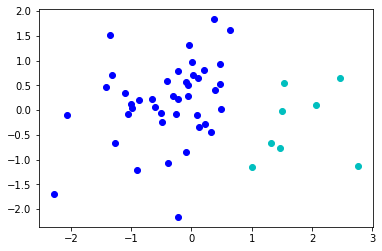

In [4]:
X, Y = generate_data(50, 2, 0.3)
plot_data(X, Y)

plt.show()

encountered misclassified point
data [ 0.31696263 -0.4341621 ], label -1.0
w [-0.31696263  0.4341621 ], b -1.0


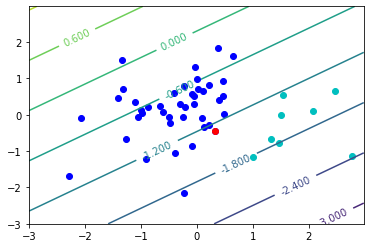

encountered misclassified point
data [ 1.5070529  -0.01919494], label 1.0
w [1.1900903  0.41496718], b 0.0


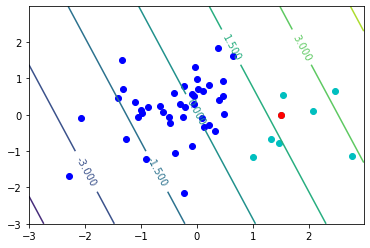

encountered misclassified point
data [0.02007746 0.7091995 ], label -1.0
w [ 1.1700128 -0.2942323], b -1.0


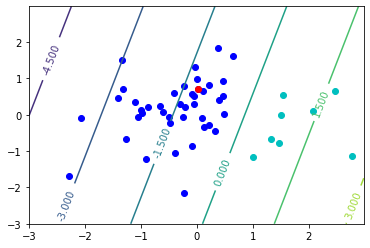

In [5]:
def perceptron(w, b, x, y):
    if(y * (nd.dot(w,x) + b)).asscalar() <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0

w = nd.zeros(shape=(2))
b = nd.zeros(shape=(1))

for (x, y) in zip(X, Y):
    res = perceptron(w, b, x, y)
    if (res == 1):
        print('encountered misclassified point')
        print(f'data {x.asnumpy()}, label {y.asscalar()}')
        print(f'w {w.asnumpy()}, b {b.asscalar()}')   
        plot_score(w, b)
        plot_data(X, Y)
        plt.scatter(x[0].asscalar(), x[1].asscalar(), color='r')
        plt.show()

In [8]:
Eps = np.arange(0.025, 0.45, 0.025)
Err = np.zeros(shape=(Eps.size))

for j in range(10):
    for(i, epsilon) in enumerate(Eps):
        X, Y = generate_data(1000, 2, epsilon)
        
        for(x, y) in zip(X, Y):
            Err[i] += perceptron(w, b, x, y)

Err = Err / 10.0

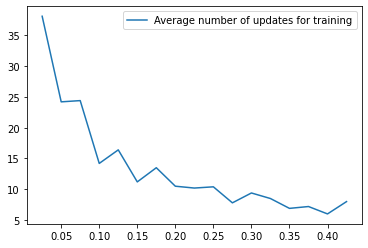

In [9]:
plt.plot(Eps, Err, label = 'Average number of updates for training')
plt.legend()
plt.show()